In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import vgg16

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
len(np.unique(y_train))

10

In [7]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

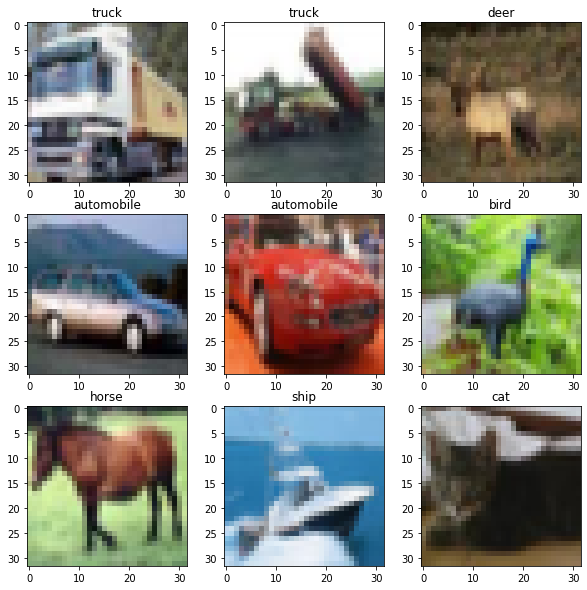

In [8]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i+1])
  plt.title(cifar10_classes[y_train[i+1][0]])

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [14]:
base_model = vgg16.VGG16(weights=None,include_top = False,input_shape=(32,32,3))

In [15]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [16]:
for layer in base_model.layers:
    layer.trainable = False

In [17]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [18]:
model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation="softmax"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,815,946
Trainable params: 101,258
Non

In [20]:
model.compile(optimizer="adam", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
# Set checkpointer and train model
mdlCheck = keras.callbacks.ModelCheckpoint('cifar100_resnet.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

es = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)
callBack = [mdlCheck,es]

In [22]:
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test),epochs=10,callbacks=callBack)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 2.3003 - accuracy: 0.1065
Epoch 1: val_accuracy improved from -inf to 0.14790, saving model to cifar100_resnet.h5
1563/1563 [==============================] - 22s 11ms/step - loss: 2.3003 - accuracy: 0.1065 - val_loss: 2.2800 - val_accuracy: 0.1479
Epoch 2/10
1560/1563 [============================>.] - ETA: 0s - loss: 2.2426 - accuracy: 0.1462
Epoch 2: val_accuracy improved from 0.14790 to 0.15900, saving model to cifar100_resnet.h5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2426 - accuracy: 0.1462 - val_loss: 2.2071 - val_accuracy: 0.1590
Epoch 3/10
1558/1563 [============================>.] - ETA: 0s - loss: 2.1980 - accuracy: 0.1613
Epoch 3: val_accuracy improved from 0.15900 to 0.17110, saving model to cifar100_resnet.h5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.1980 - accuracy: 0.1612 - val_loss: 2.1664 - val_accuracy: 0.1711
Epoch 4/10
1558/1563 [=========

In [25]:
import pandas as pd

In [28]:
trained_epochs = history.epoch
data = pd.DataFrame(history.history)
data

,loss,accuracy,val_loss,val_accuracy
0,2.300291,0.10654,2.279955,0.1479
1,2.242598,0.14620,2.207070,0.1590
2,2.198030,0.16120,2.166419,0.1711
3,2.155261,0.17092,2.122683,0.1726
4,2.121285,0.17480,2.101277,0.1735
5,2.102652,0.17730,2.091526,0.1840
6,2.090739,0.18120,2.075299,0.1867
7,2.082334,0.18184,2.061749,0.1948
8,2.077269,0.18492,2.065433,0.1888
9,2.068299,0.18876,2.051115,0.2043


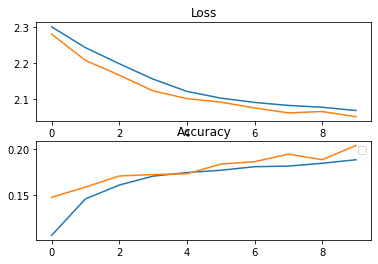

In [29]:
plt.subplot(2,1,1)
plt.plot(trained_epochs,data['loss'])
plt.plot(trained_epochs,data['val_loss'])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(trained_epochs,data['accuracy'])
plt.plot(trained_epochs,data['val_accuracy'])
plt.title("Accuracy")
plt.legend()